In [2]:
from utils.loaders import EpicKitchensDataset, ActionNetDataset
from omegaconf import OmegaConf
import random
import torch
import librosa
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

### Test dataloader for different configs

In [9]:
dataset_conf = OmegaConf.create(
    {'annotations_path': 'train_val', 'shift': 'D1-D1', 'workers': 4, 'stride': 2, 'resolution': 224, 'RGB': {'data_path': '../an_data/frames/', 'tmpl': 'img_{:010d}.jpg', 'features_name': '5c_5f'}, 'Event': {'rgb4e': 6}, 'stride': 1}
)

for split in ['train', 'val']:
    for sampling in [True]:
        for num_frames in [32]:
            num_clips = 10
            dt = ActionNetDataset("ActionNet", 
                                    ['EMG'], 
                                    split, 
                                    dataset_conf, 
                                    {'RGB':16, 'EMG': num_frames}, 
                                    num_clips, {'RGB': True, 'EMG': sampling}, 
                                    load_feat=False,
                                    additional_info=False, require_spectrogram = True)
            done = True
            for i in tqdm(range(len(dt))):
                try:
                    dt[i]
                except Exception as e: 
                    done = False
                    print(f"Sample number {i} - Dense: {sampling}, num_frames = {num_frames}, {split} dataset has failed because of the following error:")
                    print(f"{e}\n\n\n\n\n")
            if done:
                print(f"Dense: {sampling}, num_frames = {num_frames} {split} dataset has passed\n\n")
            else:
                print(f"Dense: {sampling}, num_frames = {num_frames} {split} dataset has failed\n\n")
            
            dataloader = torch.utils.data.DataLoader(dt, batch_size=32, shuffle=False, num_workers=0)
            for i, data in enumerate(dataloader):
                continue
            print(f"Batch test passed\n\n")


2023-06-04 19:37:33 LOG INFO Dataloader for ActionNet - train with 526 samples generated
 15%|█▌        | 81/526 [00:03<00:16, 26.94it/s]


KeyboardInterrupt: 

### S04

In [9]:
dataset_conf = OmegaConf.create(
    { 'annotations_path': 'train_val',
      'shift': 'Actionnet-Actionnet', 
      'workers': 4, 'stride': 1, 
      'resolution': 224, 
      'RGB': {
          'data_path': '../an_data/frames/', 
          'tmpl': 'img_{:010d}.jpg', 
          'features_name': 'ACTIONNET/feature_actionnet'
        }, 
       'EMG': {'features_name': 'ACTIONNET_EMG/2023-06-08/job_feature_extraction_lr0.234_2023-06-08 20:08:58.903778'}, 'stride': 1}
)

num_clips = 10
dt = ActionNetDataset("S04", 
                        ['RGB', 'EMG'], 
                        'train', 
                        dataset_conf, 
                        {'RGB':16, 'EMG': 32}, 
                        num_clips, {'RGB': True, 'EMG': True}, 
                        load_feat=True, 
                        additional_info=False, require_spectrogram = True)

data_loader = torch.utils.data.DataLoader(dt, batch_size=32, shuffle=False, num_workers=0)

2023-06-10 18:58:23 LOG INFO Dataloader for S04 - train with 51 samples generated


In [23]:
data, label = iter(data_loader).next()

In [28]:
data

{'RGB': tensor([[[6.2931e-01, 2.1667e-01, 3.6811e-01,  ..., 0.0000e+00,
           2.7555e-01, 7.7361e-02],
          [9.6247e-02, 3.2919e-01, 8.9204e-02,  ..., 9.9396e-02,
           1.0186e-01, 1.8382e-01],
          [3.2186e-01, 3.2821e-02, 1.3103e-01,  ..., 2.3596e-01,
           6.4398e-02, 1.7295e-01],
          ...,
          [1.5772e-01, 1.7163e-01, 3.6199e-01,  ..., 4.1438e-01,
           4.7579e-01, 3.7230e-01],
          [2.3133e-01, 9.9983e-02, 1.9588e-01,  ..., 0.0000e+00,
           5.5839e-01, 1.6200e-01],
          [1.0748e-01, 7.1259e-02, 2.8429e-01,  ..., 5.7911e-02,
           2.1430e-01, 1.9868e-02]],
 
         [[7.6478e-01, 2.8517e-01, 3.1957e-01,  ..., 4.1051e-02,
           2.5166e-01, 4.0475e-01],
          [5.7112e-01, 8.1668e-02, 2.3427e-01,  ..., 2.6050e-02,
           2.2203e-01, 1.6623e-01],
          [5.5779e-01, 2.3917e-01, 5.3792e-01,  ..., 2.2310e-04,
           2.1089e-01, 3.6002e-01],
          ...,
          [3.1626e-01, 2.6608e-01, 4.9385e-01,  ...

In [4]:
for i in range(51):
    try:
        print(f"{dt[i][0]['RGB'].shape} {dt[i][0]['EMG'].shape}")
    except Exception as e:
        print(f"Sample number {i} has failed because of the following error:")
        print(f"{e}\n\n\n\n\n")

torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size([10, 1024]) torch.Size([5, 1024])
torch.Size

In [26]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(len(specgram), 1, figsize=(16, 8))

    axs[0].set_title(title or "Spectrogram (db)")

    for i, spec in enumerate(specgram):
        im = axs[i].imshow(librosa.power_to_db(specgram[i]), origin="lower", aspect="auto")
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)

    axs[i].set_xlabel("Frame number")
    axs[i].get_xaxis().set_visible(True)
    plt.show(block=False)


In [28]:
VERBS = ['Spread',
 'Get/Put',
 'Clear',
 'Slice',
 'Clean',
 'Pour',
 'Load',
 'Peel',
 'Open/Close',
 'Set',
 'Stack',
 'Unload']

In [29]:
def plt_image_and_signal(sample, label, clip_no = 0):
    # extract the image and the emg signal
    # frames = sample['RGB']
    signal = sample['EMG']
    print(f"Sample has shape: {signal.shape}")
    (channels, _, h) = signal.shape
    fig, axs = plt.subplots(2, 8, figsize=(16, 4))
    signal = signal.reshape(2, 8, -1, h, h)
    signal = signal.permute(2, 0, 1, 3, 4)
    print(f"Sample has shape(after reshape): {signal.shape}")
    clip = clip_no
    for arm in [0, 1]:
        for channel in range(8):
            # print(type(axs))
            im = axs[arm][channel].imshow(librosa.power_to_db(signal[clip][arm][channel]), origin="lower", aspect="auto")
            axs[arm][channel].get_xaxis().set_visible(False)
            axs[arm][channel].get_yaxis().set_visible(False)
    fig.suptitle(f"Spectrogram (db): {VERBS[label]}(clip {clip})")
    plt.show()

In [ ]:
for 

Sample has shape: torch.Size([16, 1280, 256])
Sample has shape(after reshape): torch.Size([5, 2, 8, 256, 256])


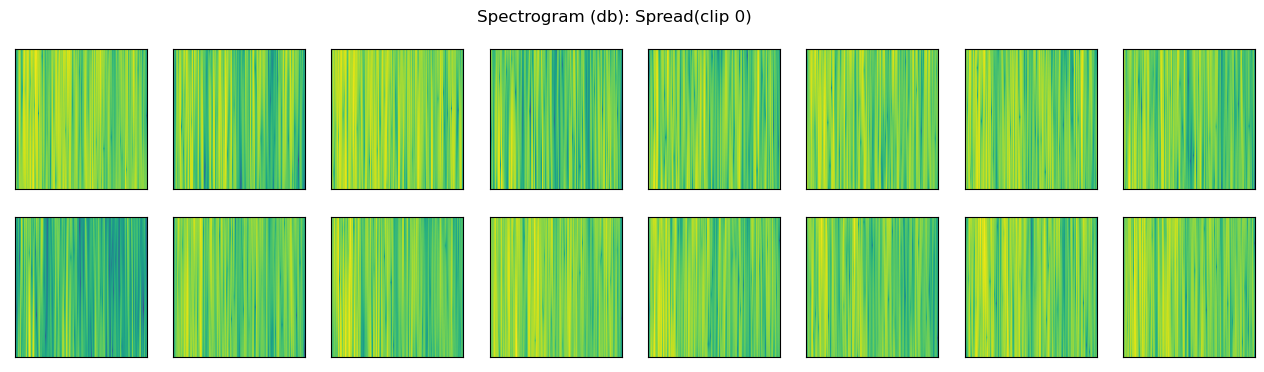

In [30]:
sample, label = dt[0]
plt_image_and_signal(sample, label, clip_no=0)

Sample has shape: torch.Size([16, 320, 64])
Sample has shape(after reshape): torch.Size([5, 2, 8, 64, 64])


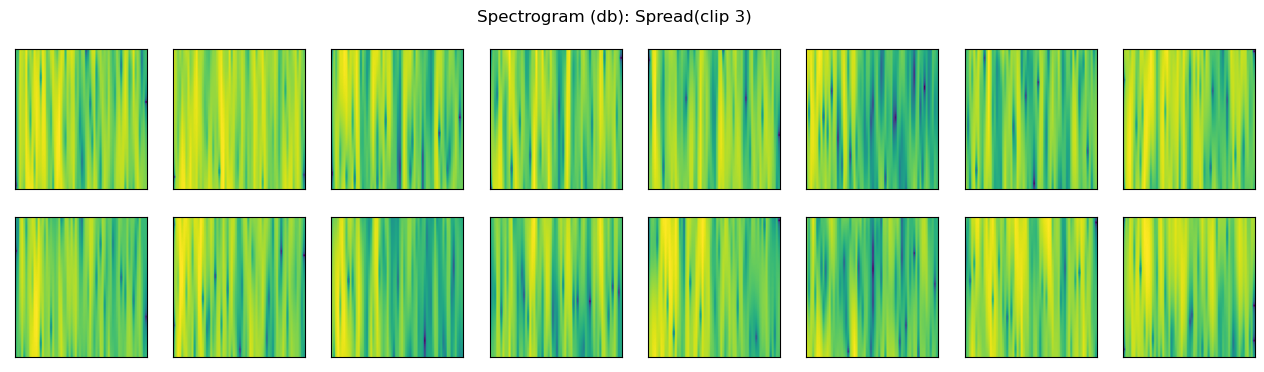

In [19]:
plt_image_and_signal(sample, label, clip_no=3)

### Load_feat test


In [2]:
dataset_conf = OmegaConf.create(
    {'annotations_path': 'train_val', 'shift': 'Actionnet-Actionnet', 'workers': 4, 'stride': 2, 'resolution': 224, 'RGB': {'data_path': '../an_data/frames/', 'tmpl': 'img_{:010d}.jpg', 'features_name': 'saved_features/ACTIONNET/FT_D_S04_16f_5c'}, 'EMG':  {'features_name':'saved_features/ACTIONNET_EMG/EMG_nf-32_clip-10_embedding_size-256_D' }, 'Event': {'rgb4e': 6}, 'stride': 1}
)

num_clips = 10
dt = ActionNetDataset("S04", 
                                    ['RGB', 'EMG'], 
                                    'train', 
                                    dataset_conf, 
                                    {'RGB':16, 'EMG': 32}, 
                                    num_clips, {'RGB': True, 'EMG': True}, 
                                    load_feat=True, 
                                    additional_info=True, require_spectrogram = True)

dt[7]
# for i in range(51):
#     try:
#         (sample, label, _, _) = dt[i]
#         sample
#     except Exception as e:
#         print(f"Sample number {i} has failed because of the following error:")
#         print(f"{e}\n\n\n\n\n")


2023-06-06 14:03:52 LOG INFO Dataloader for S04 - train with 51 samples generated


Len: 0


AssertionError: 